In [6]:
#1) data collection 
import pandas as pd
df=pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [2]:
# 2)Data Cleaning
print("Data Information:")
df.info()  # Provides column data types and non-null counts
print("\n")

print("Data Description:")
print(df.describe())  # Provides summary statistics for numerical columns
print("\n")

print("Missing Values in Each Column:")
print(df.isnull().sum())  # Shows the count of null values per column

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Data Description:
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.6937

In [3]:
import numpy as np

# Extracting the required columns
x = df['age']   
y = df['charges']  

# Calculating mean
mean_x = x.mean()
mean_y = y.mean()

# Calculating total sum
sum_x = x.sum()
sum_y = y.sum()

# Printing results
print(f"Mean Age: {mean_x:.2f} years")  
print(f"Mean Charges: ${mean_y:.2f}")  
print(f"Total Money Spent on Insurance: ${sum_y:,.2f}")  # Formatting with commas


Mean Age: 39.21 years
Mean Charges: $13270.42
Total Money Spent on Insurance: $17,755,824.99


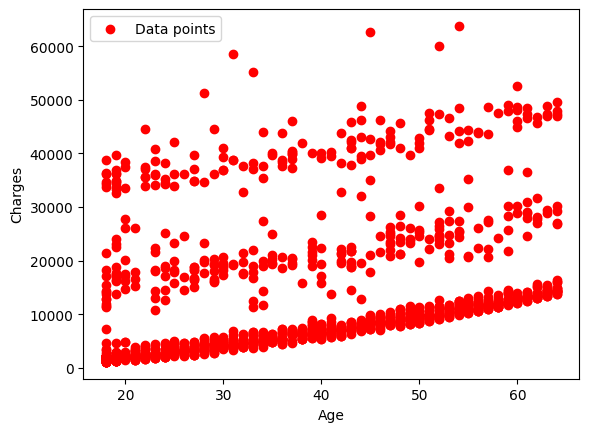

In [5]:
import matplotlib.pyplot as plt
plt.scatter(x, y, label="Data points", color='red')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend()
plt.show()

<Axes: xlabel='age', ylabel='charges'>

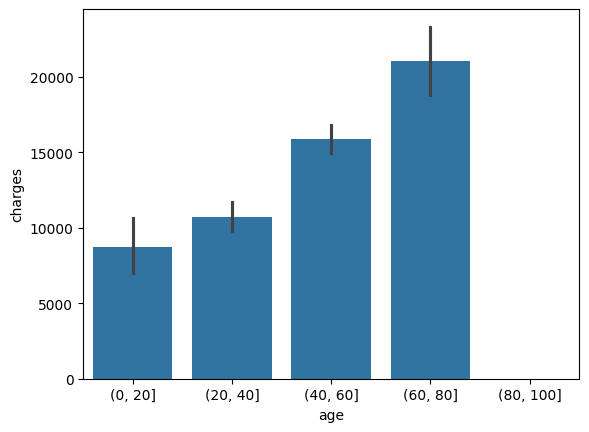

In [4]:
import seaborn as sns
df['age'] = pd.cut(df['age'], bins=[0, 20, 40, 60, 80, 100])
sns.barplot(x=df['age'], y=df['charges'])

In [12]:
#using linaer regression on the dataset and predicting the charges.
print(df[['age','bmi','charges']].head(20))

    age     bmi      charges
0    19  27.900  16884.92400
1    18  33.770   1725.55230
2    28  33.000   4449.46200
3    33  22.705  21984.47061
4    32  28.880   3866.85520
5    31  25.740   3756.62160
6    46  33.440   8240.58960
7    37  27.740   7281.50560
8    37  29.830   6406.41070
9    60  25.840  28923.13692
10   25  26.220   2721.32080
11   62  26.290  27808.72510
12   23  34.400   1826.84300
13   56  39.820  11090.71780
14   27  42.130  39611.75770
15   19  24.600   1837.23700
16   52  30.780  10797.33620
17   23  23.845   2395.17155
18   56  40.300  10602.38500
19   30  35.300  36837.46700


In [ ]:
LINEAR REGRESSION USING AGE & CHARGES AND BMI & CHARGES.

In [16]:
import numpy as np

In [ ]:
#AGE AND CHARGES
x = df['age']   
y = df['charges']  
mean_x=np.mean(x)
mean_y=np.mean(y)
print("mean of age = ",mean_x," and charges = $",mean_y)
sum_x=np.sum(x)
sum_y=np.sum(y)
print("sum of age = ",sum_x," and charges = $",sum_y)

mean of age =  39.20702541106129  and charges =  13270.422265141257
sum of age =  52459  and charges =  17755824.990759


In [10]:
#CALCULATING SLOPE 
#b1
nume=np.sum((x-mean_x)*(y-mean_y))  
deno=np.sum((x-mean_x) ** 2)            
b1=nume/deno  # Slope

In [11]:
#b1
print(b1)

257.7226186668955


In [13]:
#b0
b0=mean_y-(b1*mean_x)
print(b0)

3165.885006063025


In [18]:
# 3)Making Pricdictions
X_new =int(input("enter the age:"))
ans = b1 * X_new + b0
print("Slope (b1):", b1)
print("Intercept (b0):", b0)
print("Prediction for charges when age is ",X_new,"years : $", ans)

enter the age: 80


Slope (b1): 257.7226186668955
Intercept (b0): 3165.885006063025
Prediction for charges when age is  80 years : $ 23783.694499414665


Finding the regression models accuracy

In [24]:
df = df.apply(lambda col: col.astype('category').cat.codes if col.dtypes == 'object' else col)

In [25]:
# Define features (X) and target variable (y)
X = df.drop(columns=['age'])  # Adjust column name as needed
y = df['charges']

In [26]:

# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Split dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
y_pred = lr_model.predict(X_test)

# Calculate accuracy using R² score and convert to percentage
accuracy = r2_score(y_test, y_pred) * 100
print(f"Linear Regression Accuracy of age & charges: {accuracy:.2f}%")


Linear Regression Accuracy of age & charges: 100.00%


In [ ]:
# AGE AND BMI
#AGE AND CHARGES
x1 = df['bmi']   
y1 = df['charges']  
mean_x1=np.mean(x1)
mean_y1=np.mean(y1)
print("mean of bmi = ",mean_x1," and charges = $",mean_y1)
sum_x1=np.sum(x1)
sum_y1=np.sum(y1)
print("sum of bmi = ",sum_x1," and charges = $",sum_y1)
#CALCULATING SLOPE 
#b1
nume1=np.sum((x1-mean_x1)*(y-mean_y1))  
deno1=np.sum((x1-mean_x1) ** 2)            
B1=nume1/deno1  # Slope
#b0
B0=mean_y1-(B1*mean_x1)
# 3)Making Pricdictions
X_new1 =int(input("enter the bmi:"))
ans1 = B1 * X_new1 + B0
print("Slope (b1):", B1)
print("Intercept (b0):", B0)
print("Prediction for charges when bmi is ",X_new1," :$", ans1)

mean of bmi =  30.66339686098655  and charges =  13270.422265141257
sum of bmi =  41027.625  and charges =  17755824.990759


enter the bmi: 30


Slope (b1): 393.8730307973952
Intercept (b0): 1192.9372089611516
Prediction for charges when bmi is  30  :$ 13009.128132883006
